In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Import data

We have shared the records gathered from Open Alex on Zenodo. However, we cannot share the data we gathered from Web of Science and Scopus. 

If you want to rerun the code, we would advise you to gather the records directly from the Scopus and Web of Science public interfaces using the same search strings we used. The results will be somewhat different and dependent on when you gather the data.

Search string for Scopus:
*AFFIL(("independent” AND “scholar") OR ("independent” AND “researcher”) OR “independent academic” OR ("independent” AND “historian") OR  "unaffiliated” OR “private researcher” OR “private scholar” OR (“freelance*” AND NOT “consultant”) OR ("independent” AND “sociologist") OR ("independent” AND “psychologist") OR ("independent” AND “philosopher") OR “independent archaeologist” OR "independent author" OR "citizen scientist" OR "independent collaborator" OR “independent photographer” OR "independent writer" OR ("independent” AND “artist") OR (“volunteer” AND “scholar”) OR (“volunteer” AND “researcher”) OR “amateur archaeologist” OR “gentleman scientist” AND NOT (“department of independent academic scholar”)*

Search string for Web of Science Core Collection:
*AD=(("independent” AND “scholar") OR ("independent” AND “researcher”) OR “independent academic” OR ("independent” AND “historian") OR "unaffiliate*” OR “private researcher” OR “private scholar” OR (“freelance*” NOT “consultant”) OR ("independent” AND “sociologist") OR ("independent” AND “psychologist") OR ("independent” AND “philosopher") OR “independent archaeologist” OR "independent author" OR "citizen scientist" OR "independent collaborator" OR “independent photographer” OR "independent writer" OR ("independent” AND “artist") OR (“volunteer” AND “scholar”) OR (“volunteer” AND “researcher”) OR “amateur archaeologist” OR “gentleman scientist”  NOT (“department of independent academic scholar”))*

In [ ]:
# import scopus data
scopus = pd.read_csv("scopus20240219.csv") #Change this to the file downloaded from Scopus
print("There are ", scopus.EID.nunique(), "records found in Scopus with our search query")

# import wos data
wos = pd.read_csv("wos240110.tsv") # change this to the file downloaded from WoS
print("There are ",wos.ID.nunique()," records found in Web of Science with our search query")

# import openalex data (ths step has to be repeated with the updated dataset)
openalex = pd.read_csv("240307_open_alex_works.tsv", sep="\t", index_col=0)

print("There are ", openalex.work_id.nunique(), " records found in Open Alex with our search query")

There are  21801 records found in Scopus with our search query
There are  541  records found in Web of Science with our search query
There are  29394  records found in Open Alex with our search query


<ipython-input-48-5d1514ab867a>:10: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  openalex = pd.read_csv("240307_open_alex_works.tsv", sep="\t", index_col=0)


# 1. Plot the evolution through time

Number of records in Scopus:  21801


<Axes: xlabel='Year'>

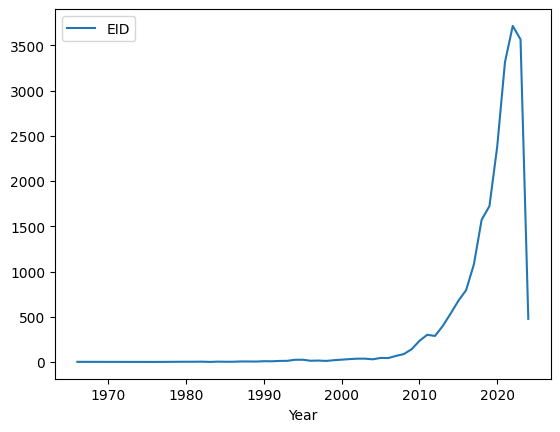

In [ ]:
# scopus
print("Number of records in Scopus: ",scopus.EID.nunique())

scopusYears = pd.DataFrame(scopus.groupby("Year").EID.nunique())
scopusYears.plot()

<Axes: xlabel='Year'>

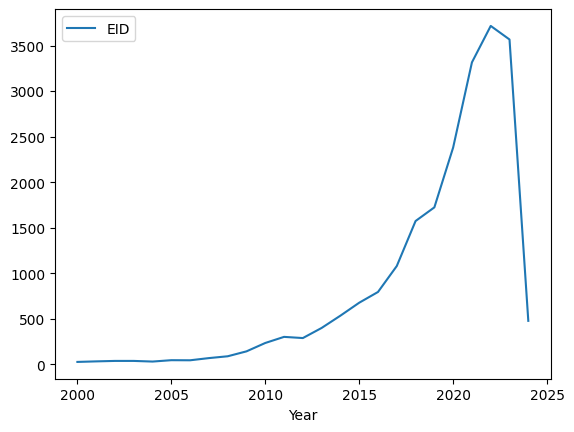

In [ ]:
scopusYears2000 = scopusYears.query("Year > 1999")
scopusYears2000.plot()

Number of records in WoS:  892


<Axes: xlabel='PY'>

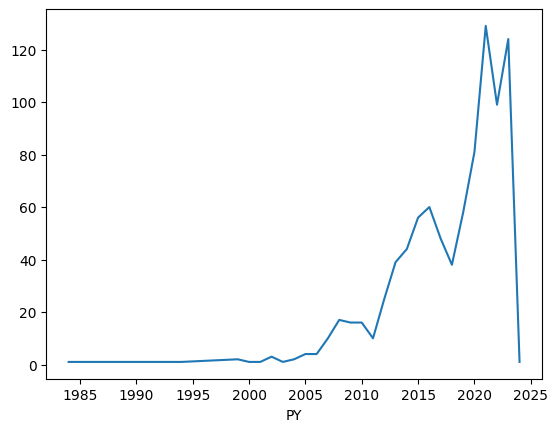

In [ ]:
#wos
print("Number of records in WoS: ", wos.UT.nunique())

wos_year = wos.groupby("PY").UT.count()

wos_year.plot()

<Axes: xlabel='PY'>

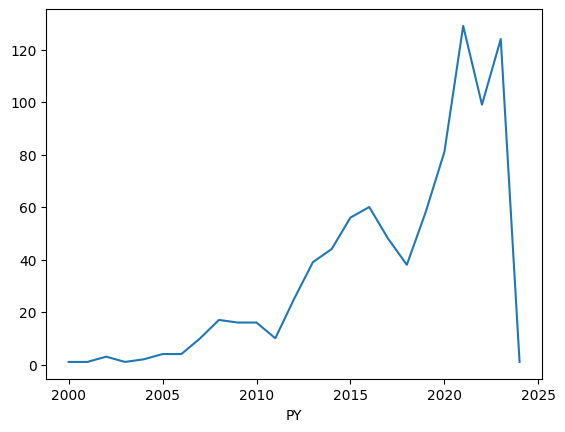

In [ ]:
wos_year2000 = wos.query("PY > 1999").groupby("PY").UT.count()

wos_year2000.plot()

In [ ]:
# open alex -> there seem to be quite a lot of duplicates here also.
print(len(openalex.work_id.unique()), openalex.shape[0])

29394 41690


Number of records in Open Alex:  29394


<Axes: xlabel='publication_year'>

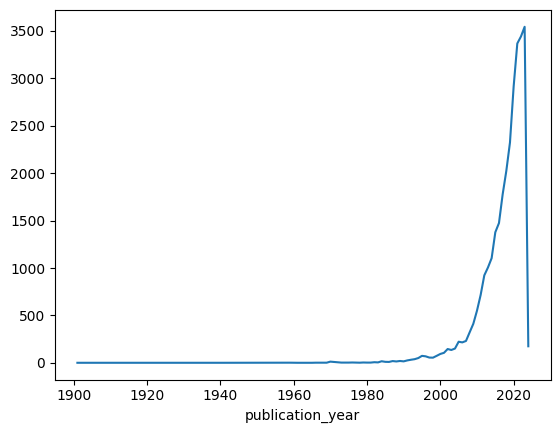

In [ ]:
print("Number of records in Open Alex: ", openalex.work_id.nunique())
openalex_year = openalex.groupby("publication_year").work_id.nunique()

openalex_year.plot()

I will check out what records are from a long time ago

In [ ]:
# This one is not really from 1901
openalex.query("publication_year < 1920")
# Open Alex is probably more reliable for recent records (it took over from Microsoft Academic which was launched in the 2010s

,work_id,doi,publication_year,publication_date,publ_type,cited_by_count,is_retracted,is_paratext,oa_status,language,...,version,source_id,is_in_doaj,issn_l,source_type,display_name,host_organization_name,country_code,issn,publisher
26516,https://openalex.org/W399627699,https://doi.org/10.1177/002205740105302131,1901,1901-05-01,article,0,False,False,closed,en,...,NaN,https://openalex.org/S2927652741,False,0022-0574,journal,Journal of Education,SAGE Publishing,US,"[""0022-0574"",""2515-5741""]",SAGE Publishing


<Axes: xlabel='publication_year'>

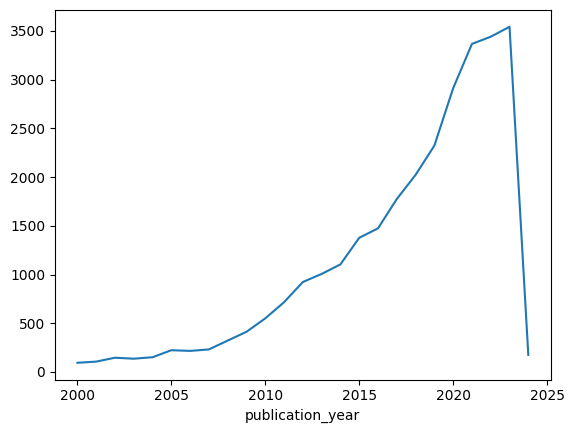

In [ ]:
openalex_year2000 = openalex.query("publication_year > 1999").groupby("publication_year").work_id.nunique()

openalex_year2000.plot()

All together in one plot

In [ ]:
scopusYear = scopusYears2000.copy()
wosYear = pd.DataFrame(wos_year2000)
openalexYear = pd.DataFrame(openalex_year2000)

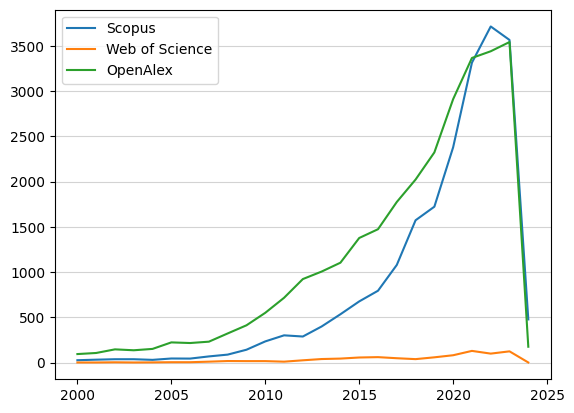

In [ ]:
plt.plot(scopusYear.index,scopusYear["EID"], label="Scopus")
plt.plot(wosYear.index,wosYear["UT"], label="Web of Science")
plt.plot(openalexYear.index, openalexYear["work_id"], label = "OpenAlex")

plt.legend()
plt.grid(axis='y', color='lightgrey',zorder=1)

plt.show()

It is interesting to see that in 2023, we find more records in Scopus than in Open Alex!

# 2. Publication types

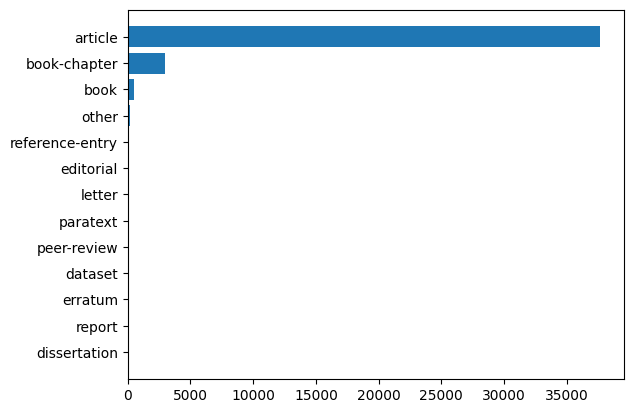

In [ ]:
#Open Alex
oa_types = pd.DataFrame(openalex.groupby("publ_type").work_id.count()).sort_values(by="work_id", ascending=True)

fig, ax = plt.subplots()

ax.barh(y = oa_types.index, width = oa_types.work_id)

plt.show()

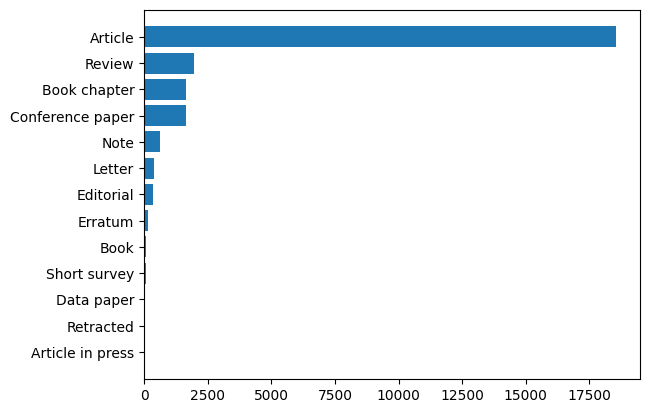

In [ ]:
# Scopus

scopus_types = pd.DataFrame(scopus.groupby("Document Type").EID.count()).sort_values(by="EID", ascending=True)

fig, ax = plt.subplots()

ax.barh(y = scopus_types.index, width = scopus_types.EID)

plt.show()

<ipython-input-61-0bb622265380>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wos_types.index, rotation=45)


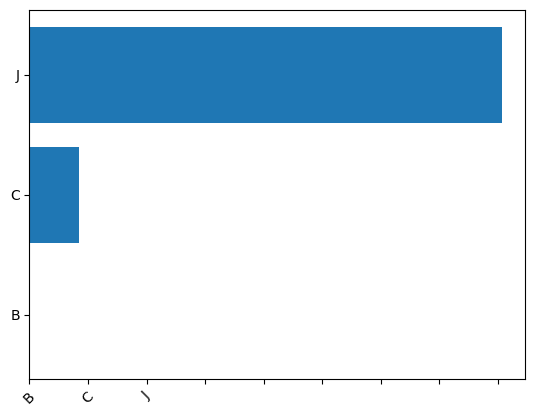

In [ ]:
# Web of Science
# J = journal article
# B = Book
# C not on website

wos_types = pd.DataFrame(wos.groupby("PT").UT.count()).sort_values(by="UT", ascending=True)

fig, ax = plt.subplots()

ax.barh(y = wos_types.index, width = wos_types.UT)

ax.set_xticklabels(wos_types.index, rotation=45)

plt.show()

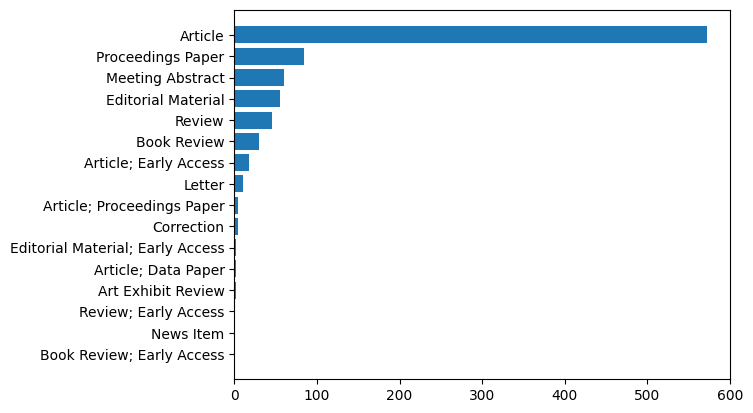

In [ ]:
# Web of Science Document types (more fine-grained)

wos_types = pd.DataFrame(wos.groupby("DT").UT.count()).sort_values(by="UT", ascending=True)

fig, ax = plt.subplots()

ax.barh(y = wos_types.index, width = wos_types.UT)


plt.show()

# 3. Language

In [ ]:
# Openalex
languages_oa = openalex[["work_id","language"]].drop_duplicates()
pd.DataFrame(languages_oa.groupby("language").work_id.nunique()).sort_values(by="work_id", ascending=False)


,EID
Language of Original Document,
English,25225
Russian,175
Italian,23
Spanish,17
German,16
French,7
Portuguese,7
Ukrainian,6
Dutch,5


In [ ]:
# Scopus
pd.DataFrame(scopus.groupby("Language of Original Document").EID.count()).sort_values(by="EID", ascending=False)

,EID
Language of Original Document,
English,25225
Russian,175
Italian,23
Spanish,17
German,16
French,7
Portuguese,7
Ukrainian,6
Dutch,5


In [ ]:
# Web of Science
pd.DataFrame(wos.groupby("LA").UT.count()).sort_values(by="UT", ascending=False)

,UT
LA,
English,881
Spanish,3
German,2
Italian,2
Russian,2
Portuguese,1
Turkish,1


## 4. Number of publications with DOI

In [ ]:
print("Number of records in WoS with DOI: ", wos.query("DI.notna()").UT.nunique())
print("Number of records in Scopus with DOI: ", scopus.query("DOI.notna()").EID.nunique())
print("Number of records in Open Alex with DOI: ", openalex.query("doi.notna()").work_id.nunique())

Number of records in WoS with DOI:  754
Number of records in Scopus with DOI:  20737
Number of records in Open Alex with DOI:  26473
